# What is probability?

Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails.  You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.

This intuitive notion of odds is a **probability**. 

## Probability as symmetry, or from a model

### Symmetry

Consider another example. If we were tossing a 'fair' six-sided dice, we may thus equivalently say that the odds of the dice falling on any one of its sides is $1/6$. Indeed if there are $C$ different equally likely possibilities, we'd expect that the probability of any one particular outcome would be $1/C$.

The examples of the coin as well as the dice illustrate the notion of probability springing from **symmetry**. Here we think of probability of of the number 4 on the dice as the ratio:

$$\frac{Number\: of\: cases\: for\: number\: 4}{number\: of\: possibilities} = \frac{1}{6},$$
 assuming equally likely possibilities.



### From a model

But now think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelihood of a candidate winning. However people do make **models** of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likeyhoods of candidates winning and run large numbers of **simulations** of the election, making predictions based on that. 

Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer **simulations** which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.

In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to **estimate** a probability, or the odds, of an **event** $E$ occuring. 

## Probability as frequency

The example above of doing multiple symbols has the feel of defining probability in terms of frequency, even if the frequency is in terms of simulations run in code on a computer.

Consider doing a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

This is the notion of probability as a **relative frequency**: if there are multiple ways an **event** like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened. 

This jibes with our general notion of probability from symmetry: indeed you can think of it as an experimental verification of a symmetry based model.

We can test the model of a fair coin by having carried out a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

### Simulating the results of the model

We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6).

In [1]:
import numpy as np
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H H H T H H T H T H H H H H T T T T H H T T T T H T H T H T T H T T H H T H T H
Number of Heads: 21
p1 = Number of Heads/Total Throws: 0.525


In [2]:
for i in range(100):
    throws=throw_a_coin(40)
    print(np.sum(throws=='H'))

17
24
18
22
19
20
15
21
24
20
23
27
14
21
22
25
24
21
17
23
18
29
20
21
25
21
18
20
26
19
17
17
12
19
18
19
18
23
19
13
24
20
17
17
16
17
20
17
13
17
13
20
16
17
21
20
19
19
18
16
19
20
14
23
22
13
19
21
21
19
19
25
18
22
20
26
22
20
19
23
20
19
19
16
15
18
21
17
24
23
15
18
16
21
23
18
19
14
23
17


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [3]:
def make_throws(N):
    throws=throw_a_coin(N)
    if N <= 100:
        print("Throws:"," ".join(throws))
    else:
        print("First 100 Throws:"," ".join(throws[:100]))
    print("Number of Heads:", np.sum(throws=='H'))
    print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/N)
make_throws(40)

Throws: H T T T T T H H H H H H T H T H T H T H T T T H H H H H H H H H H T T T T T T T
Number of Heads: 21
p1 = Number of Heads/Total Throws: 0.525


Our intuitive notion is that as we do many more trials, we should find half the tosses being heads

In [4]:
make_throws(1000)

First 100 Throws: H T H T H T T T T T H T H H H H T H H H T T T T H H H H T H T H H H T T T T H T H H H T H T H T H H H T T H T H H T H H H T H H H T T H T T H H H T T T T T H T H H T H T H H T T H H T T T T T T T H T
Number of Heads: 510
p1 = Number of Heads/Total Throws: 0.51


In [5]:
make_throws(10000)

First 100 Throws: H H T H H H H H H T H T H T T T H T H H T H H H T H T T H H H H H T H T H T T H T T H H H T T T H T T H H H H H T H H H H T H H H H H H H T H T H H T H T H T H T H T H T T T T T H H H T T T H H H T T
Number of Heads: 5047
p1 = Number of Heads/Total Throws: 0.5047


As you can see, the larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

/var/folders/jg/hbbg3rzj0fx91ns2hkgtqrv40000gn/T/ipykernel_51688/690244664.py:5: RuntimeWarning: invalid value encountered in scalar divide
  plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/j for j in trials], 'o-', alpha=0.2);


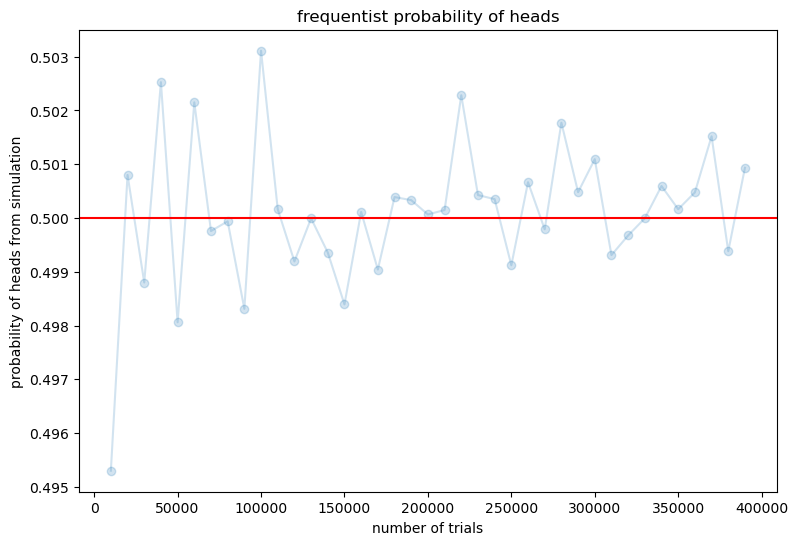

In [7]:
## %matplotlib inline
import matplotlib.pyplot as plt
trials=np.arange(0, 400000, 10000)
plt.figure(figsize=(9,6))
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/j for j in trials], 'o-', alpha=0.2);
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller. These **fluctations** are what give rise to probability distributions.


Thus, even a probability is not simply a probability. It comes with a distribution which depends on how many "tosses" or "throws" we have in our sample.

The distribution for each toss is called the **Bernoulli** distribution, 

## A Simple Election Model

Let us import data that contains a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that Obama or Romney would win. We import the required libraries first.

In [8]:
import pandas as pd # imports a library to handle data as dataframe

In [17]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
predictwise

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55
Colorado,0.807,0.193,9
Connecticut,1.000,0.000,7
Delaware,1.000,0.000,3
District of Columbia,1.000,0.000,3


Each row is the probability predicted by Predictwise that Romney or Obama would win a state. The votes column lists the number of electoral college votes in that state.

In the case of tossed coins, even though we have a model which says that the probability of heads is 0.5, there are sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 1000 replications with an election each, Romney would win in 938 of those Arizonas **on the average** across the replications. And there would be some samples with Romney winning more, and some with less. We can run these **simulated** universes on a computer though not in real life.

How did these probabilities come about. It does not matter. I might have fit a deep neural network, a bayesian model, or just asked people to bet (thats what predictwise did). Its all just a model.

### Single simulation for a particular state

Let us consider the sixth state, `Colorado` and do one random simulation for this state. We use the function `np.random.uniform` to draw 1 sample from a uniform distribution of interval \[a,b) with an equal probability. The default values of a and b is \[0,1). Documentation about the function [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html)

#### Uniform Distribution (in numpy)

`np.random.uniform` gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the **Uniform Distribution**.

We then say:

$$X \sim Uniform([0,1),$$

which is to be read as **X has distribution Uniform([0,1])**. 

In [20]:
print(predictwise.loc['Colorado'])
sim = np.random.uniform()
print(sim)

Obama     0.807
Romney    0.193
Votes     9.000
Name: Colorado, dtype: float64
0.18986760650741996


Obama would would win Colorado for this particular simulation if his probability is higher than the random uniform number between 0 and 1. With and Obama probability of 0.807, Obama wins in this particular case.

In [21]:
obama_win = (predictwise.loc['Colorado'].Obama > sim)*1
print(obama_win)

1


Run this cell many times:

In [22]:
obama_win = (predictwise.loc['Colorado'].Obama > np.random.uniform())*1
print(obama_win)

1


Using `np.random.uniform` and comparing it to a probability threshold to get a 0 or 1 - this is nothing but a **Bernoulli Random Variable** for Colorado state.

A Bernoulli Random Variable is the simplest kind of random variable. It can take on two values,
1 and 0. It takes on a 1 if an experiment with probability *p* resulted in success and a 0 otherwise. A coin toss is another example of a Bernoulli Random Variable.  

What assigning the vote to Obama when the random variable **drawn** from the Uniform distribution is less than the Predictwise probability of Obama winning (which is a Bernoulli Parameter) does for us is this: lets say we have a large number of simulations and $p_{Obama}=0.8$. Now if we draw lots of numbers between 0 and 1, uniformly, then 80\% of the time, the random numbes drawn will be below 0.8. Thus we will now have many simulations with Obama either winning or losing, but winning about 80% of the time.

### Multiple simulations for a particular State

Now let's try and make 1000 simulations for Colorado. This is like making 1000 coin tosses with a biased coin. We expect Obama to win in about 80% of these

In [24]:
print(predictwise.loc['Colorado'])
sims = np.random.uniform(size=1000)
print(sims[:100])

Obama     0.807
Romney    0.193
Votes     9.000
Name: Colorado, dtype: float64
[0.92613685 0.04255931 0.18009995 0.08637484 0.08268032 0.5582933
 0.23405549 0.51847322 0.91727629 0.92683513 0.21065351 0.0910816
 0.97704924 0.31542405 0.07035709 0.45344145 0.10544168 0.09452658
 0.46146581 0.56561017 0.71734555 0.43314052 0.66005008 0.7627206
 0.29169487 0.08851833 0.41422691 0.30647493 0.0214084  0.56085871
 0.54867863 0.06684157 0.58726985 0.91534492 0.05515729 0.64771784
 0.73108105 0.07313982 0.24964582 0.63443185 0.39883261 0.59724314
 0.59703998 0.38804489 0.26199268 0.47188978 0.30338497 0.97288743
 0.38906081 0.95909734 0.08586949 0.85809654 0.45548733 0.2457879
 0.45059019 0.66426288 0.69294222 0.36199874 0.48683173 0.89800739
 0.30571522 0.79398438 0.08702425 0.05808763 0.02669202 0.97983622
 0.32033569 0.67028708 0.59839399 0.16828308 0.1477882  0.17505667
 0.57323756 0.47559664 0.68584783 0.00640898 0.66342286 0.00650323
 0.85180722 0.14784378 0.00239967 0.49236478 0.8046477

With an Obama probability of about 0.8, This means that we can pick the simulations in which Obama wins Colorado by seeing in how many of the simulations the random number thrown is less than 0.8

We are simply making use of numpy broadcasting semantics here:

In [25]:
wins = sims < predictwise.loc['Colorado'].Obama
wins[:100]

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

This is a boolean numpy array. Summing coerces the True to 1 and False to 0 and gives us the total number of simulations.<br>

In [15]:
np.sum(wins)

790

Obama wins in 81% of the simulations, roughly, in Colorado

In [27]:
predictwise.Obama.shape

(51,)

In [26]:
print(predictwise)
sims = np.random.uniform(size=1000)
print(sims[:100])

                      Obama  Romney  Votes
States                                    
Alabama               0.000   1.000      9
Alaska                0.000   1.000      3
Arizona               0.062   0.938     11
Arkansas              0.000   1.000      6
California            1.000   0.000     55
Colorado              0.807   0.193      9
Connecticut           1.000   0.000      7
Delaware              1.000   0.000      3
District of Columbia  1.000   0.000      3
Florida               0.720   0.280     29
Georgia               0.004   0.996     16
Hawaii                1.000   0.000      4
Idaho                 0.000   1.000      4
Illinois              1.000   0.000     20
Indiana               0.036   0.964     11
Iowa                  0.837   0.163      6
Kansas                0.000   1.000      6
Kentucky              0.000   1.000      8
Louisiana             0.000   1.000      8
Maine                 1.000   0.000      4
Maryland              1.000   0.000     10
Massachuset

In [28]:
predictwise.Obama>np.random.uniform(size=(51, 1000))

ValueError: operands could not be broadcast together with shapes (51,) (51,1000) 

## The sources of Stochasticity

In any model, there are multiple sources of stochasticity and error. Elections help us understand some of these.

Lets ask where probabilities get their error from.

### Sampling error

Predictwise could not be asking too many bettors. Thus there is some sampling error in their probability estimates. They might have asked 1000 people who will win, and reported the frquencies as probabilities. But is they had asked another 1000 people, their answers would be somewhat different. This kind of error is called sampling error.

This kind of error can easily be demonstrated in coin tosses as well. So far we just did one run of tosses, (or for that matter, one tun of simulations). But imagine we had an infinite sequence of tosses and chose 500 toss samples from these. What fraction of these would be heads?

In [29]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:] = throw_a_coin(sample_size) == 'H'
    return np.mean(start, axis=1)

In [30]:
throw_fractions = make_throws(number_of_samples=100, sample_size=500)

So these are 100 samples of 500 coin tosses, in a situation where the coin is KNOWN to be fair, to be precise.

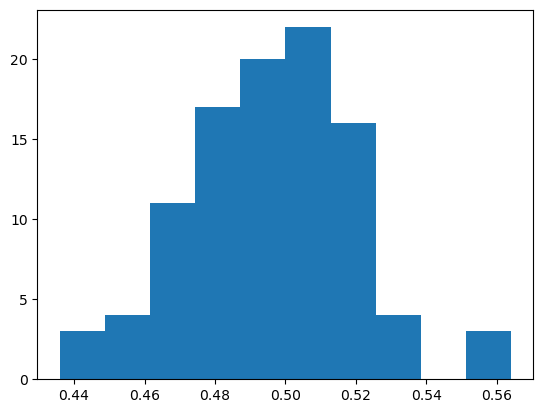

In [31]:
plt.hist(throw_fractions);

As you can see, there are samples with as many as 56% heads in this experiment. 

What hapens if you increase the sample size?

In [32]:
throw_fractions = make_throws(number_of_samples=100, sample_size=1000)

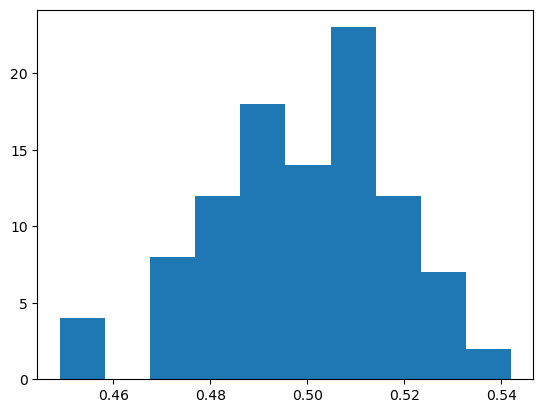

In [33]:
plt.hist(throw_fractions);

This is a tighter histogram as you might expect! More coin tosses in a sample, less the uncertainty due to sampling.


So now imagine that the lord knew the population of Colorado, and said that 81% (and the lord knows who arethe exact 81%) will vote for Obama. 

But the lord has not told us what is going on with the people of the state.

So Predictwise (or pollsters) have sampled only 1000 people (its expensive), and used that estimate to come up with a number of simulations in which Obama wins.

And if different pollsters sample 1000 different people they will come up with different answers. Thus there is sampling error we suffer from. It propagates as slightly different probabilities that we need to account for. 

### Misspecification Error

As Box said "All models are bad, but some are useful". An predictor, such as Nate Silver might construct a complex model for the probability in a state, which partially takes into account polls in the state, and which partially uses economic indicators in a regression model. There is no saying that this is the true lord givem model for how I will vote. So there will be an error that occurs because of this misspecification. This error is hard to model because we dont actually know the true model, the lord given one. We can only sniff at it by sampling and trying different models and seeing how goos our predictions are.

### Noise

Finally there is always noise. You are trying to predict my voting pattern but you do not know my financial situation. My stressors. My marital status. My family. Two people of the same race, with same income might vote very differently because of these factors. This might be throught of as an incomplete model, but the point here is that only the lord knows this info, not you and I. So in a sense its indistinguishable from modeling error.

These latter too errors would still be present if you gave me an infinite population, because they represent fundamentals of lack of knowledge and not being the lord. Sampling adds another dimension to it, you cant even get the full diversity of information you have in the population. But on a sample, its easy for all 3 of these errors to mix.

So how do we deal with these problems? The simplest answer is that we wont for now, and the predictions we will make for Obama will thus be in a sense 'more precise" than if I knew the ange of probabilities that come from many samples. But you can account for some of these effects: indeed pollsters will typically quote you a margin of error..this includes their estimate of sampling error (using a binomial distribution), their idea of systematic error (we called too many people on cell phones and thus missed old people), and their notion on noise. Ther are not usually fiddling with a regression model so dont deal with mis-specification error. But people like Nate Silver will try and fold it in with error propagation in regressions. 

Still, we are in the business of statistical models, and wont account for everything. So we always try and be conservative in our predictions. For instance in Colorado, if we are 80% likely to have Obama win, a lot of these effects might move us between 75 and 85, so our overall prediction does not really change. But our confidence in it does and we report that. 